* Competition link https://www.kaggle.com/c/house-prices-advanced-regression-techniques
* Useful reference https://github.com/ageron/handson-ml/blob/master/02_end_to_end_machine_learning_project.ipynb

In [1]:
import helpers as helpers
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
ls

README.md                       data/
Robin kaggle house price.ipynb  helpers.py
__pycache__/                    results.csv


In [3]:
#housing = pd.read_csv("data/train.csv", keep_default_na=False, index_col=0)
housing = pd.read_csv("data/train.csv", index_col=0)

In [4]:
housing.shape

(1460, 80)

The dataset has 1460 entries

Lets see what data types we have - a mixture of numerical and categorical

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

Clearly, many of the categories are missing data as they have < 1460 entries. We will need to take care of this later using Imputer.

## Data exploration

Descriptions of the data tags are in a seperate text file, but lets put that info in a dictionary

In [6]:
description = {col:helpers.get_info(col) for col in housing.columns}  # Cerate the description dict

In [7]:
description

{'1stFlrSF': ' First Floor square feet',
 '2ndFlrSF': ' Second floor square feet',
 '3SsnPorch': ' Three season porch area in square feet',
 'Alley': ' Type of alley access to property',
 'BedroomAbvGr': None,
 'BldgType': ' Type of dwelling',
 'BsmtCond': ' Evaluates the general condition of the basement',
 'BsmtExposure': ' Refers to walkout or garden level walls',
 'BsmtFinSF1': ' Type 1 finished square feet',
 'BsmtFinSF2': ' Type 2 finished square feet',
 'BsmtFinType1': ' Rating of basement finished area',
 'BsmtFinType2': ' Rating of basement finished area (if multiple types)',
 'BsmtFullBath': ' Basement full bathrooms',
 'BsmtHalfBath': ' Basement half bathrooms',
 'BsmtQual': ' Evaluates the height of the basement',
 'BsmtUnfSF': ' Unfinished square feet of basement area',
 'CentralAir': ' Central air conditioning',
 'Condition1': ' Proximity to various conditions',
 'Condition2': ' Proximity to various conditions (if more than one is present)',
 'Electrical': ' Electrical sy

Print out a description

In [8]:
desc = housing.columns[0]
print("{} : {}".format(desc, description[desc]))

MSSubClass :  Identifies the type of dwelling involved in the sale.


Look at categoricals

In [9]:
housing['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [10]:
housing['LotFrontage'] = pd.to_numeric(housing['LotFrontage'], errors='coerce')

In [11]:
housing['LotFrontage'][0:10]

Id
1     65.0
2     80.0
3     68.0
4     60.0
5     84.0
6     85.0
7     75.0
8      NaN
9     51.0
10    50.0
Name: LotFrontage, dtype: float64

In [12]:
numeric_cols = list(housing._get_numeric_data().columns)

In [13]:
list(housing.columns) not in numeric_cols

True

## Correlations
Lets look for the ten most positive correlations

In [14]:
corr_matrix = housing.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)[0:10]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

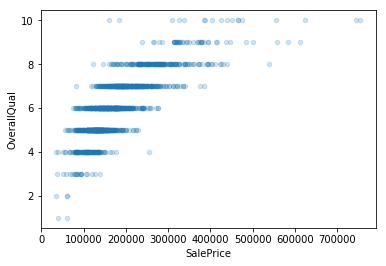

In [15]:
housing.plot(kind="scatter", x="SalePrice", y="OverallQual", alpha=0.2)
plt.show()

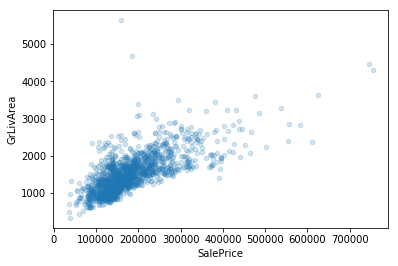

In [16]:
housing.plot(kind="scatter", x="SalePrice", y="GrLivArea", alpha=0.2)
plt.show()

## Feature engineering
To do

# Lets start some sklearn
First do a test/train split

In [17]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

Use get_dummies to convert categorical to numerical or _get_numeric_data just to use numerical data.

In [18]:
#train_set.dropna(inplace=True)
#train_set = pd.get_dummies(train_set)
train_set = train_set._get_numeric_data()
train_set.shape

(1168, 37)

In [19]:
train_set[0:10]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
255,20,70.0,8400,5,6,1957,1957,0.0,922,0,...,250,0,0,0,0,0,0,6,2010,145000
1067,60,59.0,7837,6,7,1993,1994,0.0,0,0,...,0,40,0,0,0,0,0,5,2009,178000
639,30,67.0,8777,5,7,1910,1950,0.0,0,0,...,328,0,164,0,0,0,0,5,2008,85000
800,50,60.0,7200,5,7,1937,1950,252.0,569,0,...,0,0,264,0,0,0,0,6,2007,175000
381,50,50.0,5000,5,6,1924,1950,0.0,218,0,...,0,0,242,0,0,0,0,5,2010,127000
304,20,70.0,9800,5,7,1972,1972,0.0,894,0,...,256,0,0,0,0,0,0,7,2006,149900
87,60,122.0,11911,6,5,2005,2005,0.0,0,0,...,100,38,0,0,0,0,0,3,2009,174000
1386,50,40.0,5436,4,8,1922,2007,0.0,735,0,...,0,96,0,0,0,0,0,5,2010,125500
266,20,78.0,12090,6,6,1981,1981,210.0,588,228,...,276,0,0,0,0,0,0,6,2008,175500


In [20]:
train_set.dropna(inplace=True)

In [21]:
#train_set.fillna(median)

In [22]:
train_set.shape

(889, 37)

In [23]:
housing_labels = train_set["SalePrice"].copy()
housing_prepared = train_set.drop("SalePrice", axis=1) # drop labels for training set

In [24]:
housing_labels[0:4]

Id
255     145000
1067    178000
800     175000
381     127000
Name: SalePrice, dtype: int64

In [25]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Calculate the rmse error

In [26]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
RMSE = int(lin_rmse)
RMSE

35958

Lets compare this to the mean price

In [27]:
MEAN_PRICE = int(housing_labels.mean())
MEAN_PRICE

186566

In [28]:
error = 100*(RMSE/MEAN_PRICE)
print("mean error is {}%".format(int(error)))

mean error is 19%


And the RMSE

In [29]:
helpers.rmsle(housing_labels.values, housing_predictions)  # Hmm

0.19646893399630036

Apply model to test.csv

In [30]:
testing = pd.read_csv("data/test.csv", index_col=0)
testing.shape

(1459, 79)

In [31]:
testing = testing._get_numeric_data()

In [32]:
testing.dropna(inplace=True)

In [33]:
testing.shape

(1146, 36)

In [34]:
testing.index

Int64Index([1461, 1462, 1463, 1464, 1465, 1466, 1468, 1469, 1470, 1471,
            ...
            2905, 2906, 2907, 2908, 2911, 2912, 2913, 2916, 2917, 2919],
           dtype='int64', name='Id', length=1146)

In [35]:
testing_predictions = lin_reg.predict(testing)

In [36]:
testing_predictions

array([118105.52143057, 100415.24236952, 173571.25038069, ...,
        60672.14264061, 164959.07622113, 258123.07926035])

In [37]:
results_df = pd.DataFrame(testing_predictions)

In [38]:
results_df.index = testing.index

In [39]:
results_df.head()

,0
Id,
1461,118105.521431
1462,100415.242370
1463,173571.250381
1464,199844.853730
1465,201470.277189


In [40]:
results_df.columns = ['SalePrice']

In [41]:
results_df.to_csv("results.csv")

In [42]:
results_df.shape

(1146, 1)